In [15]:
# Start by import the exp package.

import sys
import os
import numpy as np
import seaborn as sns

src_folder = os.path.dirname(os.getcwd())       # Current file is in a subfolder 'ipynb' or 'core' of the src directory
main_folder = os.path.dirname(src_folder)       # Main folder of the experiment (= where everything runs)

py_pkg_folder = os.path.join(main_folder,'libs')
if py_pkg_folder not in sys.path: sys.path.append(py_pkg_folder)
    
from exp.tools.shared import *
from exp.analysis import *
from exp.tools import *

from matplotlib import animation
from matplotlib import pyplot as plt
from IPython.display import HTML

In [17]:
def arff_to_csv(In, Out):
    """
    Convert a given .arff file to a regular .csv file.

    Explicitly hardcoded, this function eliminates all the extra .arff info.
    """

    arffInput = open(In, 'r')
    csvOutput = open(Out, 'w')

    # First we fix the header

    # Just to get the right names of the variables, in the csv-file
    dataset = arff.load(arffInput)
    attrs = dataset['attributes']
    size = len(attrs)
    new_header = []
    i = 1
    for attr in attrs:
        csvOutput.write(attr[0])
        new_header.append(attr[0])
        if i == size:
            csvOutput.write('\n')
        else:
            csvOutput.write(',')
        i += 1

    # Secondly we fix the data

    arffInput = open(In, 'r')  # arff load closes the file, so we need to open it again

    # Scanning until the data tag
    startLine = 0
    for num, line in enumerate(arffInput):
        if line == "@DATA" + "\n":
            startLine = num + 1
            break
        else:
            startLine = 1

    # Write all the data to the csv file
    for num, line in enumerate(arffInput, startLine):
        csvOutput.write(line)

    arffInput.close()
    csvOutput.close()
    return

In [281]:
arff_to_csv('/cw/dtailocal/mercs_python/data/clean/andro/andro_Clean.arff', '/cw/dtailocal/mercs_python/data/clean/andro/andro_Clean.csv')
arff_to_csv('/cw/dtailocal/mercs_python/data/clean/slump/slump_Clean.arff', '/cw/dtailocal/mercs_python/data/clean/slump/slump_Clean.csv')

In [282]:
andro = pd.read_csv('/cw/dtailocal/mercs_python/data/clean/andro/andro_Clean.csv')
enb_corr = abs(enb.corr())
enb.describe()

Var0        Var1        Var2        Var3        Var4        Var5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.400463    0.534722    0.428571    0.601852    0.500000    0.500000   
std      0.293826    0.299613    0.254382    0.409668    0.500326    0.372921   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.173611    0.312500    0.285714    0.277778    0.000000    0.250000   
50%      0.361111    0.541667    0.428571    0.666667    0.500000    0.500000   
75%      0.583333    0.770833    0.571429    1.000000    1.000000    0.750000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             Var6        Var7        Var8        Var9  
count  768.000000  768.000000  768.000000  768.000000  
mean     0.585938    0.562500    0.439396    0.368644  
std      0.333051    0.310192    0.272046    0.256216  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.250000    0.350000    0.188258    0.127121  
50%      0.625000    0.600000    0.348881    0.301104  
75%      1.000000    0.800000    0.691763    0.598775  
max      1.000000    1.000000    1.000000    1.000000

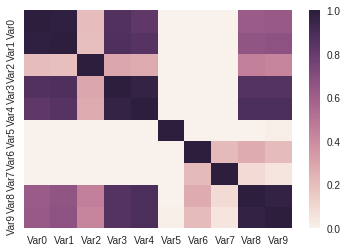

In [35]:
%matplotlib inline
sns.heatmap(enb_corr)

In [36]:
slump = pd.read_csv('/cw/dtailocal/mercs_python/data/clean/slump/slump_Clean.csv')
slump_corr = abs(slump.corr())
slump.describe()

Var0        Var1        Var2        Var3        Var4        Var5  \
count  103.000000  103.000000  103.000000  103.000000  103.000000  103.000000   
mean     0.391959    0.404009    0.573133    0.464600    0.283548    0.514708   
std      0.332815    0.313271    0.328531    0.252602    0.192297    0.258530   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.063291    0.000259    0.444231    0.250000    0.109589    0.326119   
50%      0.468354    0.518135    0.630769    0.450000    0.246575    0.500146   
75%      0.704219    0.647668    0.907500    0.618750    0.383562    0.715999   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             Var6        Var7        Var8        Var9  
count  103.000000  103.000000  103.000000  103.000000  
mean     0.378748    0.622364    0.510529    0.455961  
std      0.242319    0.301753    0.302907    0.189604  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.167942    0.500000    0.318966    0.331640  
50%      0.390589    0.741379    0.586207    0.443396  
75%      0.563887    0.827586    0.754310    0.580914  
max      1.000000    1.000000    1.000000    1.000000

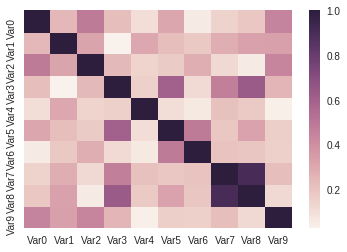

In [37]:
sns.heatmap(slump_corr)

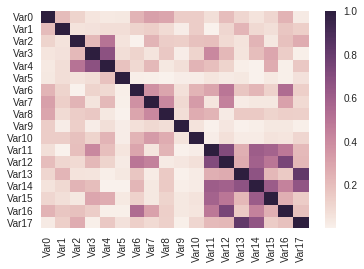

In [39]:
arff_to_csv('/cw/dtailocal/mercs_python/data/clean/jura/jura_Clean.arff', '/cw/dtailocal/mercs_python/data/clean/jura/jura_Clean.csv')
jura = pd.read_csv('/cw/dtailocal/mercs_python/data/clean/jura/jura_Clean.csv')
jura_corr = abs(jura.corr())
sns.heatmap(jura_corr)

In [42]:
from sklearn.feature_selection import mutual_info_regression

In [50]:
slump_matrix = slump.as_matrix()
slump_matrix

array([[  5.73839662e-01,   4.24870466e-01,   4.03846154e-01, ...,
          7.93103448e-01,   7.24137931e-01,   4.30575714e-01],
       [  1.09704641e-01,   7.72020725e-01,   7.34615385e-01, ...,
          0.00000000e+00,   0.00000000e+00,   5.79342042e-01],
       [  1.05485232e-01,   7.66839378e-01,   7.34615385e-01, ...,
          3.44827586e-02,   0.00000000e+00,   5.95549105e-01],
       ..., 
       [  5.13924051e-01,   4.55958549e-01,   9.21538462e-01, ...,
          0.00000000e+00,   0.00000000e+00,   8.05757136e-01],
       [  6.75527426e-01,   2.11917098e-01,   9.22692308e-01, ...,
          9.48275862e-01,   8.10344828e-01,   7.73584906e-01],
       [  8.93248945e-01,   5.18134715e-04,   8.58076923e-01, ...,
          1.00000000e+00,   1.00000000e+00,   7.63909047e-01]])

In [51]:
slump.head()

Var0      Var1      Var2    Var3      Var4      Var5      Var6  \
0  0.573840  0.424870  0.403846  0.6250  0.315068  0.573267  0.150727   
1  0.109705  0.772021  0.734615  0.2500  0.520548  0.394852  0.403213   
2  0.105485  0.766839  0.734615  0.2375  0.794521  0.386078  0.391737   
3  0.105485  0.766839  0.730769  0.2375  1.000000  0.380228  0.384086   
4  0.071730  0.580311  0.553846  0.7500  0.383562  0.628839  0.066565   

       Var7      Var8      Var9  
0  0.793103  0.724138  0.430576  
1  0.000000  0.000000  0.579342  
2  0.034483  0.000000  0.595549  
3  0.103448  0.025862  0.602080  
4  0.689655  0.758621  0.232946

In [68]:
slump_matrix[:,1:]

array([[  4.24870466e-01,   4.03846154e-01,   6.25000000e-01,
          3.15068493e-01,   5.73267037e-01,   1.50726855e-01,
          7.93103448e-01,   7.24137931e-01,   4.30575714e-01],
       [  7.72020725e-01,   7.34615385e-01,   2.50000000e-01,
          5.20547945e-01,   3.94852296e-01,   4.03213466e-01,
          0.00000000e+00,   0.00000000e+00,   5.79342042e-01],
       [  7.66839378e-01,   7.34615385e-01,   2.37500000e-01,
          7.94520548e-01,   3.86077801e-01,   3.91736802e-01,
          3.44827586e-02,   0.00000000e+00,   5.95549105e-01],
       [  7.66839378e-01,   7.30769231e-01,   2.37500000e-01,
          1.00000000e+00,   3.80228137e-01,   3.84085692e-01,
          1.03448276e-01,   2.58620690e-02,   6.02080310e-01],
       [  5.80310881e-01,   5.53846154e-01,   7.50000000e-01,
          3.83561644e-01,   6.28838842e-01,   6.65646519e-02,
          6.89655172e-01,   7.58620690e-01,   2.32946299e-01],
       [  4.61139896e-01,   4.42307692e-01,   5.25000000e-01,
   

In [67]:
mutual_info_regression(slump_matrix[:,1:],slump_matrix[:,[0]])

/cw/dtaijupiter/NoCsBack/dtai/evgeniya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.74945676,  0.92040481,  0.10978188,  0.56968756,  0.13380066,
        0.08604633,  0.05440433,  0.11399047,  0.4444668 ])

In [69]:
slump.head()

Var0      Var1      Var2    Var3      Var4      Var5      Var6  \
0  0.573840  0.424870  0.403846  0.6250  0.315068  0.573267  0.150727   
1  0.109705  0.772021  0.734615  0.2500  0.520548  0.394852  0.403213   
2  0.105485  0.766839  0.734615  0.2375  0.794521  0.386078  0.391737   
3  0.105485  0.766839  0.730769  0.2375  1.000000  0.380228  0.384086   
4  0.071730  0.580311  0.553846  0.7500  0.383562  0.628839  0.066565   

       Var7      Var8      Var9  
0  0.793103  0.724138  0.430576  
1  0.000000  0.000000  0.579342  
2  0.034483  0.000000  0.595549  
3  0.103448  0.025862  0.602080  
4  0.689655  0.758621  0.232946

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [284]:
fi = [0]*andro.shape[1]
for att in range (andro.shape[1]):
    rf = RandomForestRegressor(n_estimators = 30, max_features = 'sqrt')
    targets = list(range(andro.shape[1]))
    targets.remove(att)
    X = andro[targets]
    y = andro[[att]]
    rf.fit(X,y)
    fi[att] = rf.feature_importances_

/cw/dtaijupiter/NoCsBack/dtai/evgeniya/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/cw/dtaijupiter/NoCsBack/dtai/evgeniya/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/cw/dtaijupiter/NoCsBack/dtai/evgeniya/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/cw/dtaijupiter/NoCsBack/dtai/evgeniya/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

In [285]:
C = np.zeros((andro.shape[1],andro.shape[1]),float)
for i in range(andro.shape[1]):
    for j in range(andro.shape[1]):
        if i>j:
            C[i][j] = fi[i][j]
        if i<j:
            C[i][j] = fi[i][j-1]

In [288]:
n_clusters = (2, 6)
from sklearn.cluster.bicluster import SpectralBiclustering
model = SpectralBiclustering(n_clusters=n_clusters, method='log',random_state=0)
model.fit(C)

SpectralBiclustering(init='k-means++', method='log', mini_batch=False,
           n_best=3, n_clusters=(2, 6), n_components=6, n_init=10,
           n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

In [147]:
labels = model.row_labels_

In [150]:
labels.size

10

In [153]:
Cdf = pd.DataFrame(C)

In [154]:
Cdf

0         1         2         3         4         5         6  \
0  0.000000  0.141038  0.211470  0.084400  0.037542  0.105054  0.097788   
1  0.100678  0.000000  0.154972  0.071276  0.087186  0.103436  0.093676   
2  0.240023  0.123971  0.000000  0.096338  0.070856  0.069855  0.073475   
3  0.054941  0.046743  0.116761  0.000000  0.039976  0.243462  0.069999   
4  0.154087  0.209108  0.117748  0.125196  0.000000  0.096832  0.070949   
5  0.079479  0.059268  0.078471  0.256500  0.077661  0.000000  0.227284   
6  0.093136  0.076909  0.172831  0.115909  0.037680  0.268497  0.000000   
7  0.023287  0.102175  0.027728  0.131817  0.026553  0.075402  0.040166   
8  0.019138  0.099936  0.035339  0.164738  0.028012  0.077207  0.066308   
9  0.264268  0.115906  0.183760  0.141719  0.036097  0.079669  0.062431   

          7         8         9  
0  0.039332  0.036491  0.246886  
1  0.116489  0.126363  0.145924  
2  0.052142  0.037426  0.235914  
3  0.104221  0.222558  0.101340  
4  0.086176  0.054679  0.085226  
5  0.061681  0.080936  0.078720  
6  0.054461  0.092948  0.087629  
7  0.000000  0.514121  0.058751  
8  0.471861  0.000000  0.037462  
9  0.061326  0.054823  0.000000

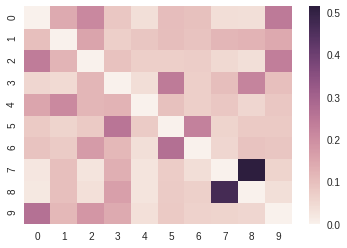

In [155]:
sns.heatmap(Cdf)

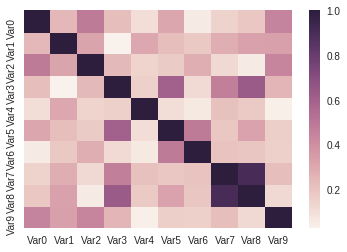

In [161]:
sns.heatmap(abs(slump.corr()))

In [168]:
model

SpectralBiclustering(init='k-means++', method='log', mini_batch=False,
           n_best=3, n_clusters=(3, 3), n_components=6, n_init=10,
           n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

In [175]:
fit_data = C[np.argsort(model.row_labels_)]
fit_data = C[:, np.argsort(model.column_labels_)]

In [261]:
data = slump
nb_atts = data.shape[1]
mi = [0] * nb_atts
for att in range(nb_atts):
    targets = list(range(nb_atts))
    targets.remove(att)
    mi[att] = mutual_info_regression(data, data[[att]], random_state=2017)
MI = pd.DataFrame(mi)
MI.values[[np.arange(len(MI.columns))] * 2] = 0

/cw/dtaijupiter/NoCsBack/dtai/evgeniya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/cw/dtaijupiter/NoCsBack/dtai/evgeniya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/cw/dtaijupiter/NoCsBack/dtai/evgeniya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/cw/dtaijupiter/NoCsBack/dtai/evgeniya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.p

In [262]:
MI

0         1         2         3         4         5         6  \
0  0.000000  0.785066  0.905024  0.089898  0.567638  0.132731  0.079103   
1  0.755437  0.000000  0.887526  0.077626  0.521759  0.180880  0.000000   
2  0.922137  0.884337  0.000000  0.264937  0.585165  0.335031  0.117438   
3  0.095777  0.074339  0.260659  0.000000  0.171868  0.333693  0.101034   
4  0.565436  0.542738  0.593979  0.204679  0.000000  0.379805  0.163931   
5  0.133652  0.185254  0.333590  0.327464  0.402636  0.000000  0.289262   
6  0.090823  0.000000  0.125481  0.105102  0.146404  0.285270  0.000000   
7  0.054092  0.112737  0.122517  0.107468  0.117614  0.184397  0.077952   
8  0.099520  0.093190  0.045134  0.356584  0.107299  0.144119  0.117049   
9  0.446501  0.304186  0.311538  0.174055  0.236472  0.000000  0.117065   

          7         8         9  
0  0.062367  0.110293  0.441510  
1  0.139883  0.098073  0.314268  
2  0.131141  0.048999  0.314032  
3  0.079164  0.361095  0.168971  
4  0.076200  0.110133  0.225894  
5  0.178383  0.133409  0.000000  
6  0.087000  0.129874  0.115717  
7  0.000000  0.793087  0.157727  
8  0.797386  0.000000  0.140543  
9  0.152778  0.120216  0.000000

In [271]:
Mii = (MI.T / MI.T.max()).T

In [272]:
Mii

0         1         2         3         4         5         6  \
0  0.000000  0.867454  1.000000  0.099332  0.627208  0.146660  0.087405   
1  0.851172  0.000000  1.000000  0.087464  0.587880  0.203802  0.000000   
2  1.000000  0.959009  0.000000  0.287308  0.634575  0.363320  0.127355   
3  0.265242  0.205870  0.721858  0.000000  0.475964  0.924113  0.279798   
4  0.951946  0.913733  1.000000  0.344589  0.000000  0.639424  0.275988   
5  0.331943  0.460103  0.828516  0.813300  1.000000  0.000000  0.718421   
6  0.318376  0.000000  0.439867  0.368431  0.513211  1.000000  0.000000   
7  0.068204  0.142150  0.154481  0.135506  0.148299  0.232506  0.098290   
8  0.124808  0.116869  0.056602  0.447191  0.134563  0.180739  0.146790   
9  1.000000  0.681266  0.697733  0.389819  0.529611  0.000000  0.262183   

          7         8         9  
0  0.068912  0.121868  0.487844  
1  0.157610  0.110502  0.354094  
2  0.142214  0.053137  0.340548  
3  0.219234  1.000000  0.467939  
4  0.128287  0.185415  0.380307  
5  0.443039  0.331339  0.000000  
6  0.304975  0.455267  0.405641  
7  0.000000  1.000000  0.198878  
8  1.000000  0.000000  0.176255  
9  0.342166  0.269240  0.000000

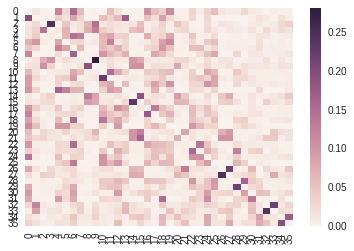

In [289]:
sns.heatmap(C)

In [290]:
fit_data = C[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

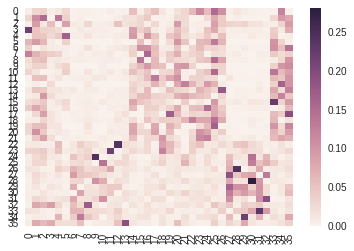

In [291]:
sns.heatmap(fit_data)